---
# Lecture 1: Introduction
---

> This course introduces students to basic microeconmetric methods. The objective is to learn how to make and evaluate causal claims. By the end of the course, students should to able to apply each of the methods discussed and critically evaluate research based on them. 

I just want to discuss some basic features of the course. We discuss the core references, the tooling for the course, student projects, and illustrate the basics of the potential outcomes model and causal graphs.

#### Causal questions

What is the causal effect of ...

* neighborhood of residence on educational performance, deviance, and youth development
* school vouchers on learning?
* of charter schools on learning?
* worker training on earnings?
* ...

What causal question brought you here?

---
## Core reference
---

The whole course is built on the following textbook:

* Winship, C., & Morgan, S. L. (2007). [*Counterfactuals and causal inference: Methods and principles for social research*](https://www.amazon.com/Counterfactuals-Causal-Inference-Principles-Analytical/dp/1107694167/ref=dp_ob_title_bk). Cambridge, England: Cambridge University Press.

This is a rather non-standard textbook in economics. However, I very much enjoy working with it as it provides a coherent conceptual framework for a host of different methods for causal analysis. It then clearly delineates the special cases that allow the application of particular methods. We will follow their lead and structure our thinking around the **counterfactual approach to causal analysis** and its two key ingredients **potential outcome model** and **directed graphs**.

It also is one of the few textbooks that includes extensive simulation studies to convey the economic assumptions required to apply certain estimation strategies. 

It is not very technical at all, so will also need to draw on more conventional resources to fill this gap.

* Wooldridge, J. M. (2001). [*Econometric analysis of cross section and panel data*](https://mitpress.mit.edu/books/econometric-analysis-cross-section-and-panel-data). Cambridge, MA: The MIT Press.

* Angrist, J. D., & Pischke, J. (2009). [*Mostly harmless econometrics: An empiricists companion*](https://www.amazon.com/Mostly-Harmless-Econometrics-Empiricists-Companion/dp/0691120358/ref=sr_1_1?keywords=mostly+harmless+econometrics&qid=1553511192&s=gateway&sr=8-1). Princeton, NJ: Princeton University Press.

* Frölich, M., and Sperlich, S. (2019). [*Impact evaluation: Treatment effects and causal analysis*](https://www.cambridge.org/core/books/impact-evaluation/F07A859F06FF131D78DA7FC81939A6DC). Cambridge, England: Cambridge University Press.


Focusing on the conceptual framework as much as we do in the class has its cost. We might not get to discuss all the approaches you might be particularly interested in. However, my goal is that all of you can draw on this framework later on to think about your econometric problem in a structured way. This then enables you to choose the right approach for the analysis and study it in more detail on your own.

<img src="material/fig-dunning-kruger.png" height="500" width="500" />

Combining this counterfactual approach to causal analysis with sufficient domain-expertise will allow you to leave the valley of despair.

---
## Lectures
---

We follow the general structure of Winship & Morgan (2007).

* Counterfactuals, potential outcomes and causal graphs

* Estimating causal effects by conditioning on observables
    * regression, matching, ...

* Estimating causal effects by other means
    * instrumental variables, mechanism-based estimation, regression discontinuity design, ...

---
## Tooling
---

We will use open-source software and some of the tools building on it extensively throughout the course.

* Course website
* GitHub
* Zulip
* Python 
* Scipy
* Jupyter 
* Travis CI
* Datasets

We will briefly discuss each of these components over the next week. By then end of the term, you hopefully have a good sense on how we combine all of them to produce sound empirical research. Transparency and reproducibility are a the absolute minimum and all then can be very easily achieved using the kind of tools of our class. 

Compared to other classes on the topic, we will do quite some programming in class. I think I have a good reason to do so. From my own experience in learning and teaching the material, there is nothing better to understand the potential and limitations of the approaches we discuss than to implemented them in a simulation setup where we have full control of the underlying data generating process.

To cite Richard Feynman: What I cannot create, I cannot understand.

However, it is often problematic that students have a very, very heterogeneous background regarding their prior programming experience and some feel intimidated by the need to not only learn the material we discuss in class but also catch up on the programming. To mitigate this valid concern, we started several accompanying initiatives that will get you up to speed such as additional workshop, help desks, etc. 

---
## Problem sets
---

Thanks to [Mila Kiseleva](https://github.com/milakis), [Tim Mensinger](https://github.com/timmens/), and [Sebastian Gsell](https://github.com/segsell) we now have four problem sets available on our website.

* Potential outcome model
* Matching
* Regression-discontinuity design
* Generalized Roy model

Just as the whole course, they do not only require you to further digest the material in the course but also require you to do some programming. They are available on our course website and we will discuss them in due course.

---
## Projects
---

Applying these methods and understanding their potential and limitations is only possible when bringing them to bear on one's one research project. So we will work on student projects during the course. Details and an example are provided [here](https://github.com/HumanCapitalAnalysis/microeconometrics/tree/master/iterations/bonn-ss-20#student-projects).

---
## Potential outcome model
---

The potential outcome model serves us several purposes:

* help stipulate assumptions
* evaluate alternative data analysis techniques
* think carefully about process of causal exposure

### Basic setup

There are three simple variables:

* $D$, treatment
* $Y_1$, outcome in the treatment state
* $Y_0$, outcome in the no-treatment state

### Examples

* economics of education
* health economics
* industrial organization
* $...$

### Exploration

We will use our first dataset to illustrate the basic problems of causal analysis. We will use the original data from the article below:

* LaLonde, R. J. (1986). [Evaluating the econometric evaluations of training programs with experimental data](https://www.jstor.org/stable/1806062). *The American Economic Review*, 76(4), 604-620.

He summarizes the basic setup as follows:

> The National Supported Work Demonstration (NSW) was temporary employment program desinged to help disadvantaged workers lacking basic job skills move into the labor market by giving them work experience and counseling in sheltered environment. Unlike other federally sponsored employment programs, the NSW program assigned qualified applications randomly. Those assigned to the treatment group received all the benefits of the NSW program, while those assigned to the control group were left to fend for themselves.

What is the *effect* of the program?

We will have a quick look at a subset of the data to illustrate the **fundamental problem of evaluation**, i.e. we only observe one of the potential outcomes depending on the treatment status but never both.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# We collected a host of data from two other influential textbooks.
df = pd.read_csv('../../datasets/processed/msc/nsw_full.csv')
df.index.set_names('Individual', inplace=True)

In [2]:
df.describe()

,treat,age,education,black,hispanic,married,nodegree,re75,re78,re74
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,495.000000
mean,0.397668,24.272021,10.257772,0.813472,0.098446,0.154145,0.794041,2845.817781,5101.356324,1910.442783
std,0.489734,6.515160,1.660444,0.389785,0.298109,0.361322,0.404662,4956.100992,6194.208666,5123.745571
min,0.000000,17.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,9.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,23.000000,10.000000,1.000000,0.000000,0.000000,1.000000,684.932700,3399.383000,0.000000
75%,1.000000,27.000000,11.000000,1.000000,0.000000,0.000000,1.000000,3368.652750,8346.530750,0.000000
max,1.000000,55.000000,16.000000,1.000000,1.000000,1.000000,1.000000,37431.660000,60307.930000,39570.680000


In [3]:
# It is important to check for missing values first.
for column in df.columns:
    if column != "re74":
        assert not df[column].isna().any()

Note that this lecture, just as all other lectures, is available on [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/HumanCapitalAnalysis/microeconometrics/master?filepath=lectures%2F01_introduction%2Flecture.ipynb) so you can easily continue working on it and take your exploration to another direction.

There are numerous discrete variables in this dataset describing the individual's background. How does their distribution look like?

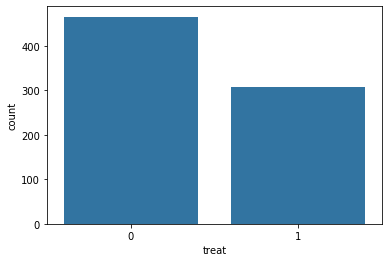

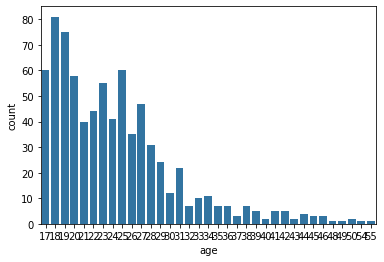

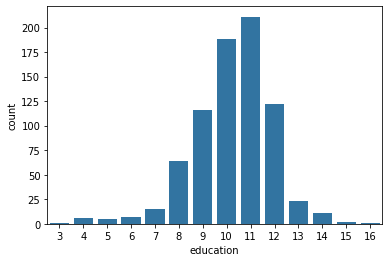

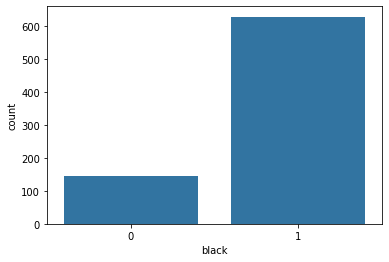

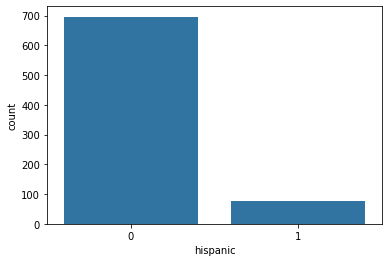

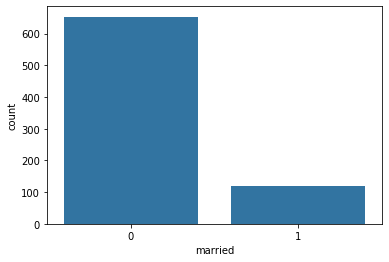

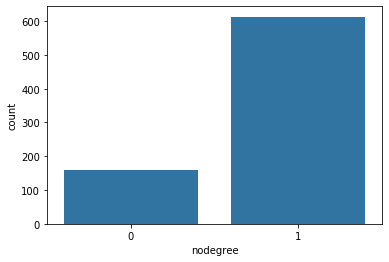

In [4]:
columns = ['treat', 'age', 'education', 'black', 'hispanic', 'married', 'nodegree']
for column in columns:
    sns.countplot(df[column], color="#1f77b4")
    plt.show()

How about the continous earnings variable?

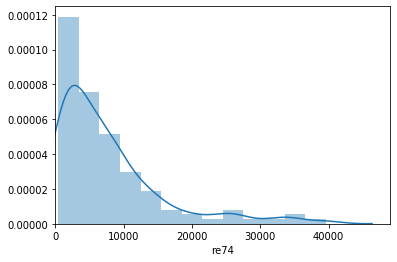

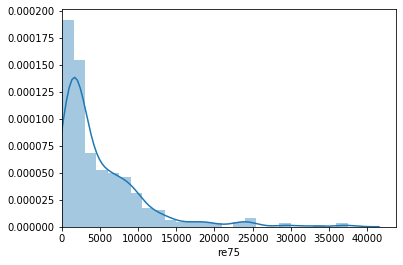

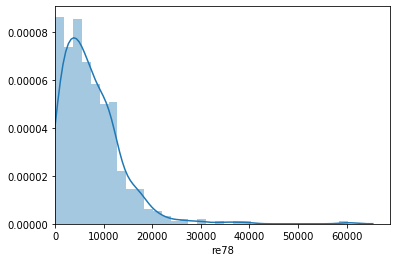

In [5]:
columns = ['re74', 're75', 're78']
for column in columns:
    
    earnings = df[column]
    
    # We drop all earnings at zero.
    earnings = earnings.loc[earnings > 0]    

    ax = sns.distplot(earnings)
    ax.set_xlim([0, None])
    
    plt.show()

What is the data that corresponds to $(Y, Y_1, Y_0, D)$?

In [6]:
# We first create True / False
is_treated = df['treat'] == 1

df['Y'] = df['re78']
df['Y_0'] = df.loc[~is_treated, 're78']
df['Y_1'] = df.loc[is_treated, 're78']

df['D'] = np.nan
df.loc[~is_treated, 'D'] = 0
df.loc[is_treated, 'D'] = 1

df[['Y', 'Y_1', 'Y_0', 'D']].sample(10)

,Y,Y_1,Y_0,D
Individual,,,,
19,10747.3500,10747.3500,NaN,1.0
218,7661.9730,7661.9730,NaN,1.0
690,202.2847,NaN,202.2847,0.0
123,0.0000,0.0000,NaN,1.0
81,647.2046,647.2046,NaN,1.0
426,20857.8400,NaN,20857.8400,0.0
358,17014.5900,NaN,17014.5900,0.0
199,5518.0830,5518.0830,NaN,1.0
492,0.0000,NaN,0.0000,0.0


Let us get a basic impression on how the distribution of earnings looks like by treatment status.

In [7]:
df.groupby('D')['re78'].describe()

,count,mean,std,min,25%,50%,75%,max
D,,,,,,,,
0.0,465.0,4652.194685,5649.711696,0.0,0.00000,2978.669,7600.1040,39483.53
1.0,307.0,5781.682585,6892.134611,0.0,49.78501,4032.708,9258.5725,60307.93


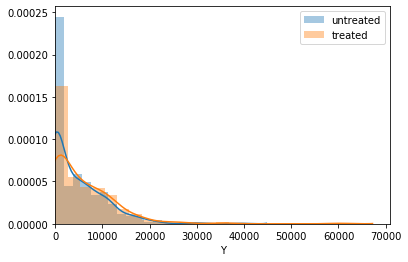

In [8]:
ax = sns.distplot(df.loc[~is_treated, "Y"], label='untreated')
ax = sns.distplot(df.loc[is_treated, "Y"], label='treated')
ax.set_xlim(0, None)
ax.legend();

We are now ready to reproduce one of the key findings from this article. What is the difference in earnings in 1978 between those that did participate in the program and those that did not?

In [9]:
stat = df.loc[is_treated, "Y"].mean() - df.loc[~is_treated, "Y"].mean()
f"{stat:.2f}"

'1129.49'

Earnings are \$1129.49 higher among those that participate in the treatment compared to those that do not. Can we say even more?

---
## Causal graphs 
---

One unique feature of our core textbook is the heavy use of causal graphs to investigate and assess the validity of different estimation strategies. Here are some examples of what to expect.

<img src="material/fig-causal-graph-1.png" height="500" width="500" />

* condition on variables, i.e. matching and regression-based estimation 

There are three general strategies to estimate causal effects and their applicability depends on the exact structure of the causal graph.

<img src="material/fig-causal-graph-2.png" height="500" width="500" />

* exogenous variation, i.e. instrumental variables estimation

<img src="material/fig-causal-graph-3.png" height="500" width="500" />

* establish an exhaustive and isolated mechanism, i.e. structural estimation

The key message for now:

* There is often more than one way to estimate a causal effect with differing demands about knowledge and observability

Pearl (2009) is the seminal reference on the use of graphs to represent general causal representations.

